## Content: Fig. S10 and S11 -- intensity and duration of HHW

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
from matplotlib import rc

### Store figures

In [9]:
dirout= "/figures/"

In [13]:
def figS11():
    
    
    '''
    This method generates a figure in four subplots.
    intensity and duration of HHW -- method 2 - for the period 2090-2100
    Two scenarios : SSP2-4.5 and SSP5-8.5
    Here the results for 17 islands stations are displayed.
    
    '''
    
    Scenarios=["ssp245","ssp585"]


    rc('text', usetex=True)# text in LateX
    
    latitudes=[9.806,12.8055,13.2398,14.3078,14.456833,14.595333,15.8876,16.264,17.555167,17.9015,20.558667,20.777667,
           20.892167,22.017333,22.276009,23.130167,27.618333]
    
    all_stations=["Hiva-oa","Pamandzi","Hihifo","Maopoopo","Takaroa","Lamentin","Tromelin",
                 "Raizet","Faaa","Saint-Barthelemy","Koumac","Ouanaham","Gillot","Tontouta","Noumea",
                 "Mangareva","Rapa"] #island stations
    
    
    fig, axs = plt.subplots(nrows=2, ncols=2,
                                sharex=True,
                                #sharey=True,
                                figsize=(8,7))

    for scenario in Scenarios:
        
        
        #some parameters
        if scenario == 'ssp245':
            ind_col=0
            color=(247/256,148/256,32/256)
            scenario_title="SSP2-4.5"
            
        else:
            ind_col=1
            color=(149/256,27/256,30/256)
            scenario_title="SSP5-8.5"
            
            
            
            
        # FIRST ROW -- Duration
        
        axs[0][ind_col].set_xlim([0,30])
        axs[0][ind_col].set_xticks([0,5,10,15,20,25,30])
        axs[0][ind_col].set_xticklabels(["0°","5°","10°","15°","20°","25°","30°"],fontsize=18)        

        axs[0][ind_col].grid(ls='--')
        axs[0][ind_col].set_yticks([0,30,60,90,120,150,180,210,240,270,300])
        axs[0][ind_col].set_yticklabels([0,30,60,90,120,150,180,210,240,270,300],fontsize=18)
        axs[0][ind_col].set_ylim([0,300])       
        
            
        axs[0][ind_col].set_ylabel("Nb of days",fontsize=18)
        
        axs[0][ind_col].set_title(scenario_title+"\nHHW - HIM - duration - Method 2",fontsize=13)
        
        # to store median values
        medians=np.empty((len(latitudes),))
        
        
        # to order stations
        i=0
        
        for station in all_stations:
            
            
            
            dirin="/CMIP6/heatwaves/"# Folder for CMIP6 data

            # Duration of HHWs during 2090-2100
            duration_mod=np.load(dirin+station+"_length_heatwaves_"+scenario+"_CMIP6_2095.npy")
            
            medians[i]=np.nanmedian(duration_mod)
            
            #PLOT
            bplot=axs[0][ind_col].boxplot(duration_mod[~np.isnan(duration_mod)],whis=(10,90),positions=np.array([latitudes[i]]), patch_artist=True,showfliers=False,widths=0.0,capprops={'alpha':0.5,'linewidth':1.5},
                      whiskerprops={'alpha':0.5,'linewidth':1},boxprops={'alpha':0.5,'linewidth':1},capwidths=1,zorder=2)
            
            axs[0][ind_col].plot(np.array([latitudes[i]]),np.nanmedian(duration_mod),color=color,marker='o',markersize=9,mec='k',linestyle='',label='medians',zorder=2)


            i+=1
        
        # Linear fit
        a, b, r, p_value, std_err=sc.linregress(np.array(latitudes), medians)

        axs[0][ind_col].plot(np.arange(-10,35,0.01),a*np.arange(-10,35,0.01)+b,color=color,linewidth=2,linestyle='--',label='lin. reg.',zorder=1)

        axs[0][ind_col].text(1,180,'a={:.2f} days/°\nb={:.2f} days\nr²={:.2f}\np-value={:.1e}'.format(np.round(a,2),np.round(b,2),np.round(r**2,2),p_value),bbox=dict(facecolor='white'),fontsize=12)


        
        
        
        
        ## SECOND ROW -- intensity
        
        
        # to store median values
        medians=np.empty((len(latitudes),))
        
        
        # to order stations
        i=0
                
        for station in all_stations:
            
            OM = find_OM(station)
            OM_obs=find_OM_obs(station)
            
            
            dirin="/CMIP6/heatwaves/"
            
            
            # Intensity of HHW during 2090-2100
            intensity_mod=np.load(dirin+station+"_intensity_heatwaves_"+scenario+"_CMIP6_2095.npy")

            # PLOT
            bplot=axs[1][ind_col].boxplot(intensity_mod[~np.isnan(intensity_mod)],whis=(10,90),positions=np.array([latitudes[i]]), patch_artist=True,showfliers=False,widths=0.0,capprops={'alpha':0.5,'linewidth':1.5},
                      whiskerprops={'alpha':0.5,'linewidth':1},boxprops={'alpha':0.5,'linewidth':1},capwidths=1,zorder=2)            #axs.plot(np.array([pos[i]]),np.array([intensity_obs]),color='k',marker='o', linestyle='',label='OBS (1990-2014)') 
            
            axs[1][ind_col].plot(np.array([latitudes[i]]),np.nanmedian(intensity_mod),color=color,marker='o',markersize=9,mec='k',linestyle='',
                                 #label='medians',
                                 zorder=2)
            
            medians[i]=np.nanmedian(intensity_mod)
            
            i+=1
        
        
        axs[1][ind_col].grid(ls='--')
        
        # Linear fit 
        a, b, r, p_value, std_err=sc.linregress(np.array(latitudes), medians)

        axs[1][ind_col].plot(np.arange(-10,35,0.01),a*np.arange(-10,35,0.01)+b,color=color,linewidth=2,linestyle='--',label='lin. reg.',zorder=1)

        axs[1][ind_col].text(1,44,'a={:.2f} °C/°\nb={:.2f} °C\nr²={:.2f}\np-value={:.1e}'.format(np.round(a,2),np.round(b,2),np.round(r**2,2),p_value),bbox=dict(facecolor='white'),fontsize=12)

        
        axs[1][ind_col].set_xticks([0,5,10,15,20,25,30])
        axs[1][ind_col].set_xticklabels(["0°","5°","10°","15°","20°","25°","30°"],fontsize=18)
        axs[1][ind_col].set_ylim([28,60])
        axs[1][ind_col].set_yticks([28,32,36,40,44,48,52,56,60])
        axs[1][ind_col].set_yticklabels([28,32,36,40,44,48,52,56,60],fontsize=18)      
        axs[1][ind_col].set_ylabel("HIM [°C]",fontsize=18)
        
        axs[1][ind_col].set_title("HHW - HIM - max intensity - Method 2",fontsize=13)
        
    fig.supxlabel("Absolute latitude",fontsize=18)

    # saving
    fig.savefig(dirout+"/figS11.svg",bbox_inches='tight',transparent=False,dpi=400) # Enregistrement du graphique en format png
    fig.savefig(dirout+"/figS11.png",bbox_inches='tight',transparent=False,dpi=400)

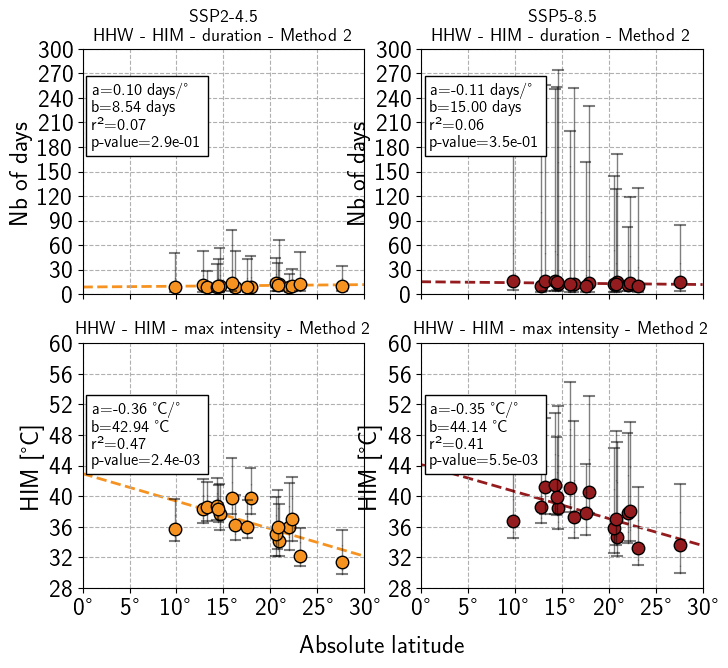

In [14]:
figS11()

In [19]:
def figS10():
    
    '''
    This method generates a figure in four subplots.
    intensity and duration of HHW -- method 1 - for the period 2090-2100
    Two scenarios : SSP2-4.5 and SSP5-8.5
    Here the results for 17 islands stations are displayed.
    
    '''
    
    Scenarios=["ssp245","ssp585"]


    rc('text', usetex=True)# text in LateX
    
    latitudes=[9.806,12.8055,13.2398,14.3078,14.456833,14.595333,15.8876,16.264,17.555167,17.9015,20.558667,20.777667,
           20.892167,22.017333,22.276009,23.130167,27.618333]
    
    all_stations=["Hiva-oa","Pamandzi","Hihifo","Maopoopo","Takaroa","Lamentin","Tromelin",
                 "Raizet","Faaa","Saint-Barthelemy","Koumac","Ouanaham","Gillot","Tontouta","Noumea",
                 "Mangareva","Rapa"] #island stations
    
    
    fig, axs = plt.subplots(nrows=2, ncols=2,
                                sharex=True,
                                #sharey=True,
                                figsize=(8,7))

    for scenario in Scenarios:
        
        
        #some parameters
        if scenario == 'ssp245':
            ind_col=0
            color=(247/256,148/256,32/256)
            scenario_title="SSP2-4.5"
            
        else:
            ind_col=1
            color=(149/256,27/256,30/256)
            scenario_title="SSP5-8.5"
            
            
            
            
        # FIRST ROW -- Duration
        
        axs[0][ind_col].set_xlim([0,30])
        axs[0][ind_col].set_xticks([0,5,10,15,20,25,30])
        axs[0][ind_col].set_xticklabels(["0°","5°","10°","15°","20°","25°","30°"],fontsize=18)        

        axs[0][ind_col].grid(ls='--')
        axs[0][ind_col].set_yticks([0,30,60,90,120,150,180,210,240,270,300])
        axs[0][ind_col].set_yticklabels([0,30,60,90,120,150,180,210,240,270,300],fontsize=18)
        axs[0][ind_col].set_ylim([0,300])       
        
            
        axs[0][ind_col].set_ylabel("Nb of days",fontsize=18)
        
        axs[0][ind_col].set_title(scenario_title+"\nHHW - HIM - duration - Method 2",fontsize=13)
        
        # to store median values
        medians=np.empty((len(latitudes),))
        
        
        # to order stations
        i=0
        
                
        for station in all_stations:


            dirin="/CMIP6/heatwaves/"

            
            # Duration of HHW during 2090-2100
            duration_mod=np.load(dirin+station+"_length_heatwaves_NOAA_s2_over3days_HIX_"+scenario+"_CMIP6_2095.npy")
            
            medians[i]=np.nanmedian(duration_mod)
            
            #PLOT
            bplot=axs[0][ind_col].boxplot(duration_mod[~np.isnan(duration_mod)],whis=(10,90),positions=np.array([latitudes[i]]), patch_artist=True,showfliers=False,widths=0.0,capprops={'alpha':0.5,'linewidth':1.5},
                      whiskerprops={'alpha':0.5,'linewidth':1},boxprops={'alpha':0.5,'linewidth':1},capwidths=1,zorder=2)
            
            axs[0][ind_col].plot(np.array([latitudes[i]]),np.nanmedian(duration_mod),color=color,marker='o',markersize=9,mec='k',linestyle='',label='medians',zorder=2)


            i+=1
        
        # Linear fit
        a, b, r, p_value, std_err=sc.linregress(np.array(latitudes), medians)

        axs[0][ind_col].plot(np.arange(-10,35,0.01),a*np.arange(-10,35,0.01)+b,color=color,linewidth=2,linestyle='--',label='lin. reg.',zorder=1)

        axs[0][ind_col].text(1,60,'a={:.2f} days/°\nb={:.2f} days\nr²={:.2f}\np-value={:.1e}'.format(np.round(a,2),np.round(b,2),np.round(r**2,2),p_value),bbox=dict(facecolor='white'),fontsize=12)



        
        
        # SECOND ROW -- Intensity
    
        
        # to store median values
        medians=np.empty((len(latitudes),))
        
        
        # to order stations
        i=0
        
        
        medians=np.empty((pos.shape[0]),)
                
        for station in all_stations:
            
          
            dirin="/CMIP6/heatwaves/"
            
            # Intensity of HHW during 2090-2100
            intensity_mod=np.load(dirin+station+"_intensity_heatwaves_NOAA_s2_over3days_HIX_"+scenario+"_CMIP6_2095.npy")

            #PLOT
            bplot=axs[1][ind_col].boxplot(intensity_mod[~np.isnan(intensity_mod)],whis=(10,90),positions=np.array([latitudes[i]]), patch_artist=True,showfliers=False,widths=0.0,capprops={'alpha':0.5,'linewidth':1.5},
                      whiskerprops={'alpha':0.5,'linewidth':1},boxprops={'alpha':0.5,'linewidth':1},capwidths=1,zorder=2)            #axs.plot(np.array([pos[i]]),np.array([intensity_obs]),color='k',marker='o', linestyle='',label='OBS (1990-2014)') 
            
            axs[1][ind_col].plot(np.array([latitudes[i]]),np.nanmedian(intensity_mod),color=color,marker='o',markersize=9,mec='k',linestyle='',
                                 #label='medians',
                                 zorder=2)
            
            medians[i]=np.nanmedian(intensity_mod)
            
            i+=1
        
        
        axs[1][ind_col].grid(ls='--')
        
        # Linear fit
        a, b, r, p_value, std_err=sc.linregress(np.array(latitudes), medians)

        axs[1][ind_col].plot(np.arange(-10,35,0.01),a*np.arange(-10,35,0.01)+b,color=color,linewidth=2,linestyle='--',label='lin. reg.',zorder=1)

        axs[1][ind_col].text(1,44,'a={:.2f} °C/°\nb={:.2f} °C\nr²={:.2f}\np-value={:.1e}'.format(np.round(a,2),np.round(b,2),np.round(r**2,2),p_value),bbox=dict(facecolor='white'),fontsize=12)

        
        axs[1][ind_col].set_xticks([0,5,10,15,20,25,30])
        axs[1][ind_col].set_xticklabels(["0°","5°","10°","15°","20°","25°","30°"],fontsize=18)
        axs[1][ind_col].set_ylim([40,60])
        axs[1][ind_col].set_yticks([40,42,44,46,48,50,52,54,56,58,60])
        axs[1][ind_col].set_yticklabels([40,42,44,46,48,50,52,54,56,58,60],fontsize=18)      
        axs[1][ind_col].set_ylabel("HIX [°C]",fontsize=18)
        
        axs[1][ind_col].set_title("HHW - HIX - max intensity - Method 1",fontsize=13)

    fig.supxlabel("Absolute latitude",fontsize=18)

    
    # saving
    fig.savefig(dirout+"/figS10.svg",bbox_inches='tight',transparent=False,dpi=400) # Enregistrement du graphique en format png
    fig.savefig(dirout+"/figS10.png",bbox_inches='tight',transparent=False,dpi=400)

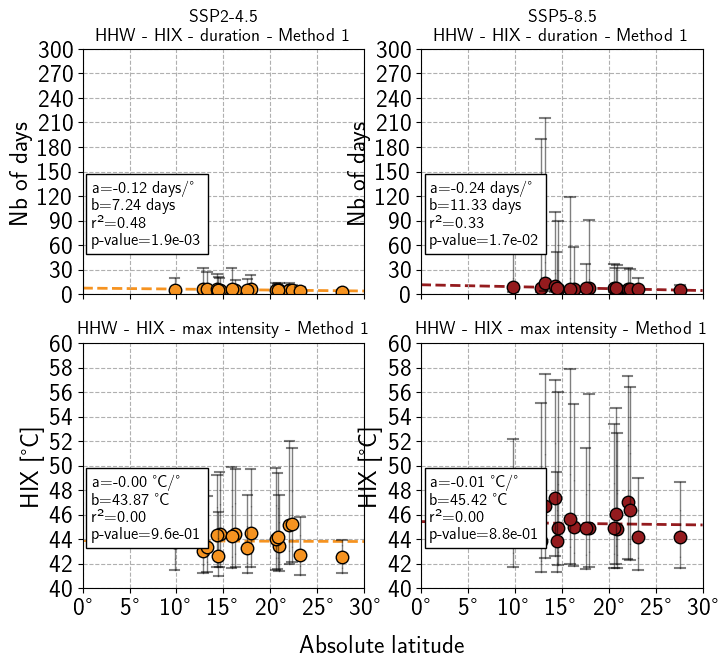

In [20]:
figS10()